# BUD: Bottlenecks, Unnecessary work, Duplicated work
Examples to show each type of possible optimization

## Bottlenecks
Given an array of distinct values, count the number of pairs of integers that have a difference k. So for the array {1,7,5,9,2,12,3} and the difference k=2, the answer would be 4 because (1,3), (3,5), (5,7), (7,9) all have difference 2.

In [75]:
import random
N = 20
arr = random.sample(range(1, N*2), N)
print(arr)
k = 2

bruteResult = 0
binResult = 0
hashResult = 0

def bruteforce(arr, k):
    count = 0
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if abs(arr[i] - arr[j]) == k:
                count += 1
    global bruteResult
    bruteResult = count
    return count

import timeit
execution_time = timeit.timeit(lambda: bruteforce(arr,k), number=10000)
print(f"Bruteforce execution Time: {execution_time} seconds for {bruteResult}")


def binarySearch(arr, target):
    l = 0
    r = len(arr) - 1
    while l <= r:
        m = (r + l) // 2
        if arr[m] == target:
            return True
        elif arr[m] < target:
            l = m + 1
        else:
            r = m - 1
    return False

# noticing that we can just sort the array and then do binary search for the specific x + k in the larger part of the array
def withBinarySearch(arr, k):
    # first sort the array
    sortd = recursiveMergeSort(arr)
    # hold number of matches
    count = 0

    # search for each x + k in part of arr with binary search
    for i in range(len(sortd)):
        if binarySearch(sortd[i+1:], sortd[i] + k) or binarySearch(sortd[i+1:], sortd[i] - k):
            count += 1
    global binResult
    binResult = count
    return count

execution_time = timeit.timeit(lambda: withBinarySearch(arr,k), number=10000)
print(f"With Binary Search execution Time: {execution_time} seconds for {binResult}")

def mergeTwoSortedLists(l1, l2):
    i1 = 0
    i2 = 0
    ret = []
    while i1 < len(l1) and i2 < len(l2):
        # print(i1, i2)
        if l1[i1] <= l2[i2]:
            ret.append(l1[i1])
            i1 += 1
        else:
            ret.append(l2[i2])
            i2 += 1
        
        # hit the end of list 1
        if i1 == len(l1):
            for i in range(i2, len(l2)):
                ret.append(l2[i])
            break
        # hit the end of list 2
        elif i2 == len(l2):
            for i in range(i1, len(l1)):
                ret.append(l1[i])
            break

    return ret

# print(f"merging two: {mergeTwoSortedLists([7],[6])}")

def recursiveMergeSort(arr):
    # print(arr)
    if len(arr) == 1:
        return arr

    l = len(arr)
    n = l // 2
    left = recursiveMergeSort(arr[:n])
    # print(f'left: {left}')
    right = recursiveMergeSort(arr[n:])
    # print(f'right: {right}')
    merged = mergeTwoSortedLists(left, right)
    # print(f'merged: {merged}')
    return merged

# r = recursiveMergeSort([7,6,2,4,5,9,10,4,55,6])
# print(f"r: {r}")


# trade time for space with putting all values in a hash table so lookup of x + k or x - k is O(1)
def withHashTable(arr, k):
    table = set(arr)
    
    count = 0
    for x in arr:
        if x + k in table:
            count += 1
    global hashResult
    hashResult = count
    return count

execution_time = timeit.timeit(lambda: withHashTable(arr,k), number=10000)
print(f"With Hash table execution Time: {execution_time} seconds for {hashResult}")

[20, 10, 15, 5, 26, 16, 22, 30, 17, 14, 38, 1, 13, 19, 35, 18, 27, 25, 33, 11]
Bruteforce execution Time: 0.062459013002808206 seconds for 10
With Binary Search execution Time: 0.14588807000109227 seconds for 10
With Hash table execution Time: 0.006699955003568903 seconds for 10


In [ ]:
from tqdm import tqdm

def getTimes(upTo):
    loop = []
    binS = []
    hashT = []
    for i in tqdm(range(5, upTo)):
        arr = random.sample(range(1, i*2), i)
        k = 2
        loop.append(timeit.timeit(lambda: bruteforce(arr,k), number=10000))
        binS.append(timeit.timeit(lambda: withBinarySearch(arr,k), number=10000))
        hashT.append(timeit.timeit(lambda: withHashTable(arr,k), number=10000))
    return loop, binS, hashT

l, b, h = getTimes(100)

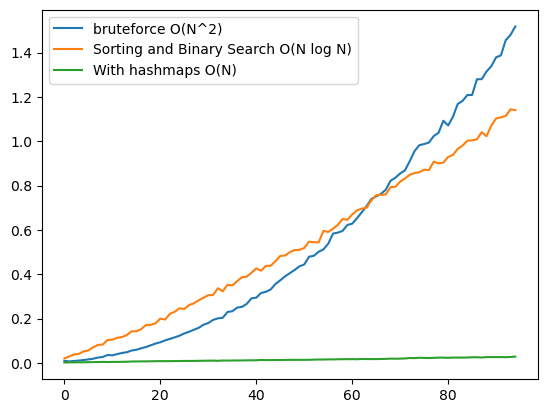

In [79]:
import matplotlib.pyplot as plt
x = range(len(l))
plt.plot(x, l, label='bruteforce O(N^2)')
plt.plot(x, b, label='Sorting and Binary Search O(N log N)')
plt.plot(x, h, label='With hashmaps O(N)')
plt.legend()
plt.show()

## Unnecessary work
If we want to find all the solutions for a^3+b^3 = c^3+d^3 for a,b,c,d all integers between 1 and 1000, our first approach (brute force) can be much improved upon by recognizing where our code is doing unnecessary work.

In [ ]:
# brute force
n = 1000
for a in range(n):
    for b in range(n):
        for c in range(n):
            for d in range(n):
                if a**3 + b**3 == c**3 + d**3:
                    print(a, b, c, d)

In [ ]:
# recognize that we can solve for the d, runtime goes from O(n^4) -> O(n^3)

def cube_root(x):
    return x**(1/3) if x >= 0 else -(-x)**(1/3)

n = 1000
for a in range(n):
    for b in range(n):
        for c in range(n):
            d = cube_root(a**3 + b**3 - c**3)
            if a**3 + b**3 == c**3 + d**3 and d > 0 and d <= n:
                print(a,b,c,d // 1)

## Duplicated work
Above we realized that searching for d was unnecessary - we can just solve for it. Now, let's think about what work we might be doing that we have already done. We shouldn't have to repeat it.

In [ ]:
# we are computing all the (c, d) pairs for EACH (a, b) pair
# why don't we just compute the (c, d) pairs once at the start
# and save c**3 + d**3 in a table with (c, d) so when we look at each
# (a, b) pair we can see if a**3 + b**3 is in our table and then retrieve (c, d) if it is
table = {}
n = 1000
for c in range(n):
    for d in range(n):
        result = c**3 + d**3
        if result not in table:
            table[result] = []
        table[result].append((c, d))

for a in range(n):
    for b in range(n):
        r = a**3 + b**3
        if r in table:
            print(table[r])

In [ ]:
# but actually, all of the (c, d) values are the same as the (a, b) values
# so we can just use the table
table = {}
n = 1000
for c in range(n):
    for d in range(n):
        result = c**3 + d**3
        if result not in table:
            table[result] = []
        table[result].append((c, d))

for result, l in table.items():
    for pair1 in l:
        for pair2 in l:
            print(pair1, pair2)